In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "Train",
    labels="inferred",
    label_mode="int",
    batch_size=50,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
    

Found 1000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [10]:
print(f"Number of batches: {len(train_ds)}")
print(f"Number of batches: {len(validation_ds)}")

Number of batches: 20
Number of batches: 7


In [11]:
try:
    for images, labels in train_ds.take(13):
        print(f"Images shape: {images.shape}")
        print(f"Labels: {labels.numpy()}")  # Print the labels to verify
except Exception as e:
    print(f"Error during iteration: {e}")



Images shape: (50, 256, 256, 3)
Labels: [1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 1 1 0 0]
Images shape: (50, 256, 256, 3)
Labels: [0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 0 1]
Images shape: (50, 256, 256, 3)
Labels: [0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 0 0 1]
Images shape: (50, 256, 256, 3)
Labels: [0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 0 0]
Images shape: (50, 256, 256, 3)
Labels: [0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 0 0 1 0 0]
Images shape: (50, 256, 256, 3)
Labels: [0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 0]
Images shape: (50, 256, 256, 3)
Labels: [1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 1 1]

In [12]:
try:
    for images, labels in validation_ds.take(5):
        print(f"Validation images shape: {images.shape}")
        print(f"Validation labels: {labels.numpy()}")
except Exception as e:
    print(f"Error during validation dataset inspection: {e}")


Validation images shape: (32, 256, 256, 3)
Validation labels: [1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0]
Validation images shape: (32, 256, 256, 3)
Validation labels: [1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1]
Validation images shape: (32, 256, 256, 3)
Validation labels: [1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0]
Validation images shape: (32, 256, 256, 3)
Validation labels: [1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1]
Validation images shape: (32, 256, 256, 3)
Validation labels: [1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0]


In [13]:
#normalize
def process(image,label):
    image = tf.cast(image/255, tf.float32)
    return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
#create model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs =10,validation_data = validation_ds)

Epoch 1/10
20/20 [==============================] - 35s 2s/step - loss: 0.7655 - accuracy: 0.5620 - val_loss: 0.6581 - val_accuracy: 0.6250
Epoch 2/10
20/20 [==============================] - 32s 2s/step - loss: 0.5686 - accuracy: 0.6790 - val_loss: 0.4795 - val_accuracy: 0.7800
Epoch 3/10
20/20 [==============================] - 31s 2s/step - loss: 0.3813 - accuracy: 0.8320 - val_loss: 0.4379 - val_accuracy: 0.7750
Epoch 4/10
20/20 [==============================] - 31s 2s/step - loss: 0.3397 - accuracy: 0.8620 - val_loss: 0.4088 - val_accuracy: 0.8350
Epoch 5/10
20/20 [==============================] - 31s 2s/step - loss: 0.2516 - accuracy: 0.9030 - val_loss: 0.4654 - val_accuracy: 0.8350
Epoch 6/10
20/20 [==============================] - 31s 2s/step - loss: 0.1942 - accuracy: 0.9270 - val_loss: 0.3130 - val_accuracy: 0.8950
Epoch 7/10
20/20 [==============================] - 31s 2s/step - loss: 0.1015 - accuracy: 0.9640 - val_loss: 0.2905 - val_accuracy: 0.8700
Epoch 8/10
20/20 [==

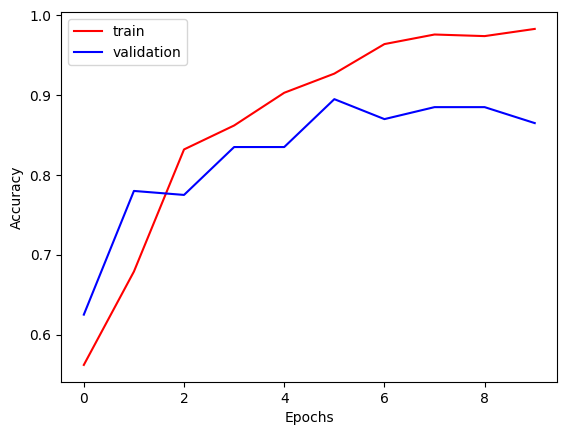

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
import cv2

In [42]:
test_img = cv2.imread('testImage4.jpg')

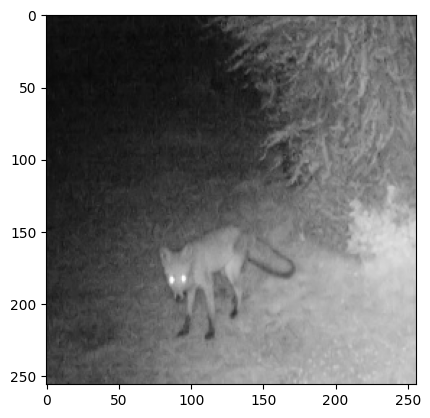

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(256, 256, 3)

In [45]:
test_img = cv2.resize(test_img,(256,256))

In [46]:
test_input = test_img.reshape((1,256,256,3))

In [47]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 57ms/step


In [48]:
if(prediction[0]==1):
    print("Fox")
else:
    print("Cheetah")

Fox


In [49]:
model.save("Wild_Animal_Detection_CNN.h5", include_optimizer=True)

C:\Users\Uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
